In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import json
import unidecode

# Index of name stations with id and other info

In [116]:

Index= pd.read_excel('IndiceBases.xlsx',   sep=';', encoding = 'latin')
np.where(Index["name"].str.find("Lavapiés")>0)

(array([117], dtype=int64),)

# Clean punctuations

In [76]:
reading_file = open("Bicimad_Stations_201905.json", "r")

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = unidecode.unidecode(stripped_line)   
    new_file_content += new_line +"\n"

reading_file.close()
writing_file = open("NewBicimad.json", "w")
writing_file.write(new_file_content)
writing_file.close()

# Read json file

In [155]:
df = pd.read_json("NewBicimad.json", orient='records', lines=True)

In [149]:
df.head()

,_id,stations
0,2019-05-01T00:20:28.426371,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
1,2019-05-01T01:20:29.224701,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
2,2019-05-01T02:20:31.066888,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
3,2019-05-01T03:20:34.080013,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
4,2019-05-01T04:20:40.213306,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."


In [150]:
df['stations'].iloc[0][0]

{'activate': 1,
 'name': 'Puerta del Sol A',
 'reservations_count': 0,
 'light': 2,
 'total_bases': 24,
 'free_bases': 12,
 'number': '1a',
 'longitude': '-3.7024255',
 'no_available': 0,
 'address': 'Puerta del Sol no 1',
 'latitude': '40.4168961',
 'dock_bikes': 11,
 'id': 1}

# Date formatting and set as index

In [151]:
df['_id']= pd.to_datetime(df['_id'], format='%Y-%m-%dT%H:%M:%S')  
df=df.set_index(['_id'])

df.head

<bound method NDFrame.head of                                                                      stations
_id                                                                          
2019-05-01 00:20:28.426371  [{'activate': 1, 'name': 'Puerta del Sol A', '...
2019-05-01 01:20:29.224701  [{'activate': 1, 'name': 'Puerta del Sol A', '...
2019-05-01 02:20:31.066888  [{'activate': 1, 'name': 'Puerta del Sol A', '...
2019-05-01 03:20:34.080013  [{'activate': 1, 'name': 'Puerta del Sol A', '...
2019-05-01 04:20:40.213306  [{'activate': 1, 'name': 'Puerta del Sol A', '...
...                                                                       ...
2019-05-31 19:27:08.364623  [{'activate': 1, 'name': 'Puerta del Sol A', '...
2019-05-31 20:27:09.667673  [{'activate': 1, 'name': 'Puerta del Sol A', '...
2019-05-31 21:27:11.094009  [{'activate': 1, 'name': 'Puerta del Sol A', '...
2019-05-31 22:27:12.831525  [{'activate': 1, 'name': 'Puerta del Sol A', '...
2019-05-31 23:27:14.487222  [{'act

# Spit lists of each time into columns

In [ ]:
df['stations'].to_list()


In [152]:
df = pd.DataFrame(df['stations'].to_list(), index=df.index).dropna()

In [153]:
df.head

<bound method NDFrame.head of                                                                           0    \
_id                                                                             
2019-05-23 18:21:48.146252  {'activate': 1, 'name': 'Puerta del Sol A', 'r...   
2019-05-23 19:21:50.482917  {'activate': 1, 'name': 'Puerta del Sol A', 'r...   
2019-05-23 20:21:50.725863  {'activate': 1, 'name': 'Puerta del Sol A', 'r...   
2019-05-23 21:21:51.546938  {'activate': 1, 'name': 'Puerta del Sol A', 'r...   
2019-05-23 22:21:53.351135  {'activate': 1, 'name': 'Puerta del Sol A', 'r...   
...                                                                       ...   
2019-05-31 19:27:08.364623  {'activate': 1, 'name': 'Puerta del Sol A', 'r...   
2019-05-31 20:27:09.667673  {'activate': 1, 'name': 'Puerta del Sol A', 'r...   
2019-05-31 21:27:11.094009  {'activate': 1, 'name': 'Puerta del Sol A', 'r...   
2019-05-31 22:27:12.831525  {'activate': 1, 'name': 'Puerta del Sol A', 'r...  

# Clean constant data

I create two dataframes: FreeBases and DockBikes

In [ ]:
def chooseData(x, y): 
    return x[y]

In [134]:
FreeBases = df.applymap(lambda x: chooseData(x, 'free_bases'))
DockBikes = df.applymap(lambda x: chooseData(x, 'dock_bikes'))

In [120]:
FreeBases.head()

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
_id,,,,,,,,,,,,,,,,,,,,,
2019-05-23 18:21:48.146252,6,4,13,6,19,18,21,13,13,10,...,15,19,11,4,6,11,16,7,15,16
2019-05-23 19:21:50.482917,15,4,16,5,19,12,17,12,17,9,...,15,16,4,1,7,13,9,3,16,18
2019-05-23 20:21:50.725863,12,8,18,5,20,10,14,15,23,8,...,8,13,4,0,15,5,0,0,21,17
2019-05-23 21:21:51.546938,12,6,20,3,21,20,15,12,21,10,...,14,9,5,8,13,8,1,0,19,18
2019-05-23 22:21:53.351135,11,7,18,2,20,18,13,16,9,12,...,16,8,7,3,3,0,0,4,19,20


In [71]:
pt.plot(FreeBases)

12

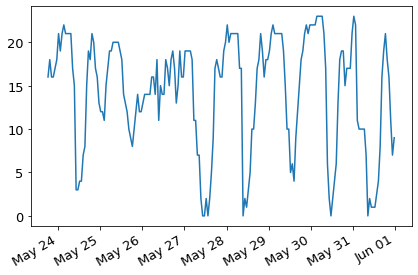

In [140]:
import matplotlib.dates as mdates
fig, ax = pt.subplots()
pt.plot(FreeBases[19])
#pt.plot(DockBikes[117])
#pt.plot(DockBikes[117]+FreeBases[117])
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.tick_params(labelsize=13)
pt.tight_layout()     
pt.gcf().subplots_adjust(bottom=0.15)
fig.autofmt_xdate()